In [1]:
import numpy as np
import pandas as pd
import h5py
import gc

import sklearn as sk

from sklearn.model_selection import ParameterGrid




import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.utils import GeneratorEnqueuer

import os
base_dir = '/media/tord/T7/Thesis_ssd/MasterThesis3'
os.chdir(base_dir)

from Classes.Modeling.DynamicModels import DynamicModels
from Classes.Modeling.StaticModels import StaticModels
from Classes.DataProcessing.LoadData import LoadData
from Classes.DataProcessing.HelperFunctions import HelperFunctions
from Classes.DataProcessing.DataHandler import DataHandler
from Classes.DataProcessing.RamLoader import RamLoader
from Classes.Modeling.GridSearchResultProcessor import GridSearchResultProcessor
from Classes.DataProcessing.ts_RamGenerator import data_generator



import sys


import random
import pprint
import re
import json


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: GeForce RTX 3090, compute capability 8.6


In [2]:
load_args = {
    'earth_explo_only' : False,
    'noise_earth_only' : False,
    'noise_not_noise' : True,
    'downsample' : True,
    'upsample' : True,
    'frac_diff' : 1,
    'seed' : 1,
    'subsample_size' : 0.05,
    'balance_non_train_set' : True,
    'use_true_test_set' : False,
    'even_balance' : True
}
loadData = LoadData(**load_args)
train_ds, val_ds, test_ds = loadData.get_datasets()
noise_ds = loadData.noise_ds
handler = DataHandler(loadData)
helper = HelperFunctions()

2 3
Balancing due to disguised labels.
This functions barely works, and is a piece of shit that should not be trusted. Only works because noise has id: 0
{'noise': 84799, 'earthquake': 84799, 'explosion': 82246}
2 3
Balancing due to disguised labels.
This functions barely works, and is a piece of shit that should not be trusted. Only works because noise has id: 0
{'noise': 12720, 'earthquake': 12720, 'explosion': 12337}
2 3
Balancing due to disguised labels.
This functions barely works, and is a piece of shit that should not be trusted. Only works because noise has id: 0
{'noise': 8480, 'earthquake': 8480, 'explosion': 8225}


Mapping train redundancy: : [--------------------------------------->] 100 %



Mapping validation redundancy: : [--------------------------------------->] 100 %

Mapping test redundancy: : [--------------------------------------->] 100 %



Loaded noise non-noise dataset.
Evenly balanced among classes in the train set.
As well as non train sets.
Distribution (Label: (counts, proportion)) of
Train ds:
earthquake: (2146, 0.255)  |  explosion: (2051, 0.2437)  |  noise: (4219, 0.5013)  
Val ds:
earthquake: (312, 0.2472)  |  explosion: (299, 0.2369)  |  noise: (651, 0.5158)  
Test ds:
earthquake: (228, 0.2711)  |  explosion: (191, 0.2271)  |  noise: (422, 0.5018)  


In [3]:
use_time_augmentor = False
use_noise_augmentor = False
scaler_name = None
filter_name = None
band_min = 2
band_max = 4
highpass_freq = 0.075

use_tensorboard = False
use_liveplots = False
use_custom_callback = False
use_early_stopping = False
start_from_scratch = False
use_reduced_lr = False
log_data = False

load_test_set = False


ramLoader = RamLoader(loadData, 
                      handler, 
                      use_time_augmentor = use_time_augmentor, 
                      use_noise_augmentor = use_noise_augmentor, 
                      scaler_name = scaler_name,
                      filter_name = filter_name, 
                      band_min = band_min,
                      band_max = band_max,
                      highpass_freq = highpass_freq, 
                      load_test_set = load_test_set)
x_train, y_train, x_val, y_val, noiseAug = ramLoader.load_to_ram()


Stage one loading training set: [--------------------------------------->] 100 %

Stage one loading validation set: [--------------------------------------->] 100 %



Process took 0:00:07.568627 seconds.


In [8]:
i = 0

[0]
[0] noise


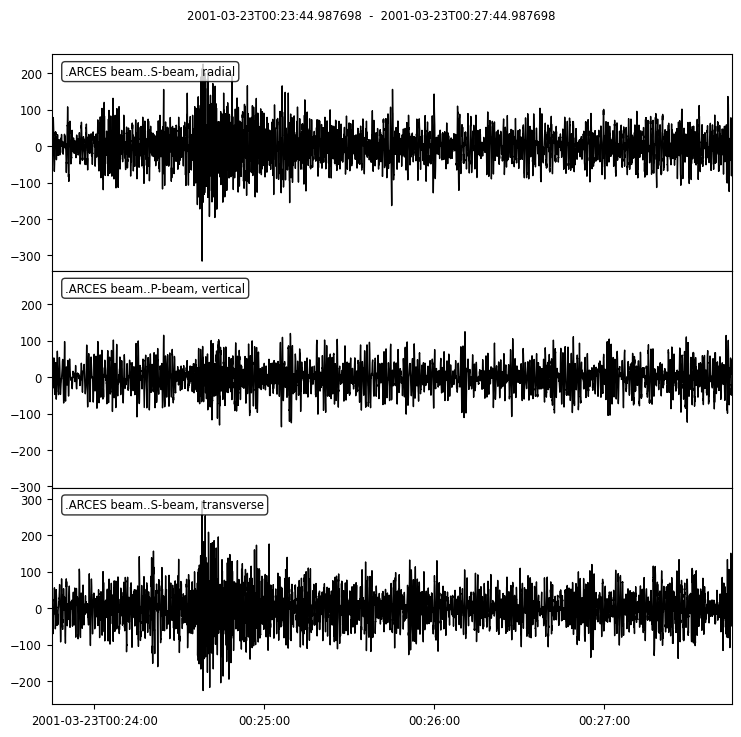

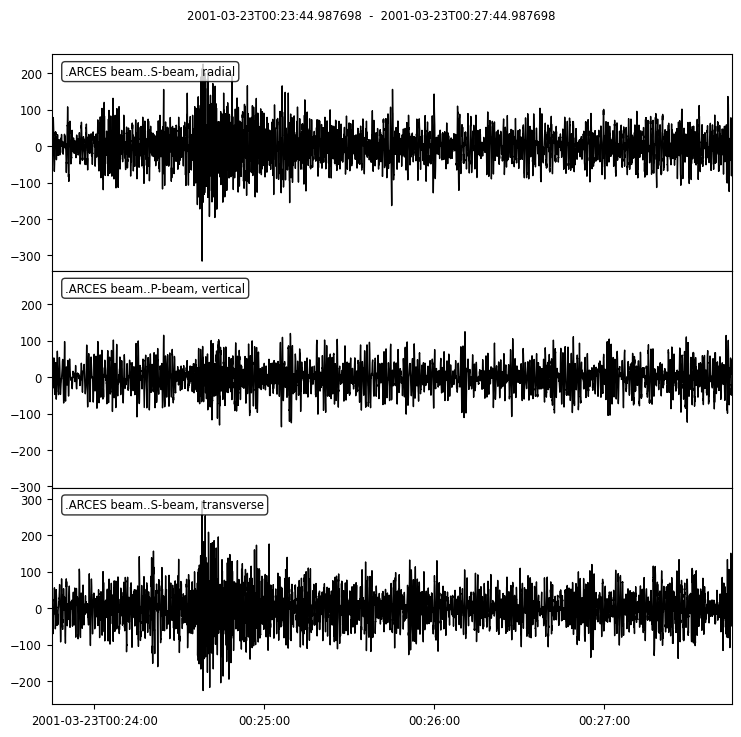

{   'analyst_pick_time': None,
    'baz_to_arces': 0.1829193982893761,
    'est_arrivaltime_arces': '2001-03-23 00:24:45',
    'trace_stats': {   'channels': [   'P-beam, vertical',
                                       'S-beam, transverse',
                                       'S-beam, radial'],
                       'sampling_rate': 40.0,
                       'starttime': '2001-03-23T00:23:44.987698Z',
                       'station': 'ARCES beam'}}


In [66]:
i +=1
sample_trace = x_train[i]
sample_label = y_train[i]
print(sample_label)
print(sample_label, train_ds[:,1][i])
original_trace, sample_info = handler.path_to_trace(train_ds[i][0])
helper.plot_event(sample_trace, sample_info)
helper.plot_event(original_trace, sample_info)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(sample_info)


In [10]:
train_ds[:,0][0]

'/media/tord/T7/Thesis_ssd/norsar_data_nov/explosions/2013-08-19T13.40.20.986000Z.h5'

In [7]:
earth_ex = '/media/tord/T7/Thesis_ssd/norsar_data_nov/explosions/1991-12-08T17.19.41.051000Z.h5'
original_trace, sample_info = handler.path_to_trace(earth_ex)
helper.plot_event(sample_trace, sample_info)
helper.plot_event(original_trace, sample_info)

OSError: Unable to open file (unable to open file: name = '/media/tord/T7/Thesis_ssd/norsar_data_nov/explosions/1991-12-08T17.19.41.051000Z.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)